In [1]:
!pip install xgboost --root-user-action=ignore

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 1.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install shap --root-user-action=ignore

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.0/978.0 kB 13.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 61.9 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 11.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install imblearn --root-user-action=ignore

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 4.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import all you need</p>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from xgboost import XGBClassifier
import shap
import joblib

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
df= pd.read_csv(r'/kaggle/input/heart-disease/framingham.csv')
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">EDA</p>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [7]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
df.shape

(4240, 16)

In [9]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Visualization</p>

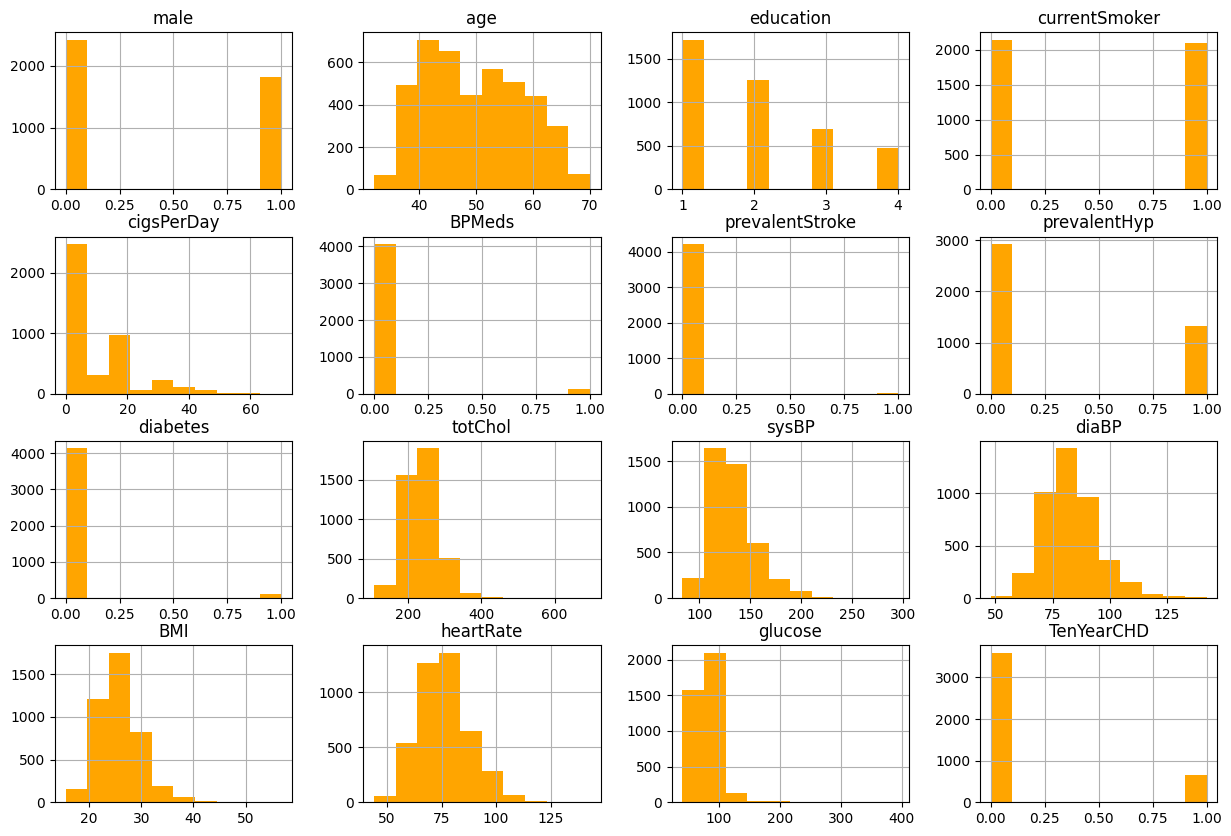

In [10]:
df.hist(figsize=(15, 10) , color='Orange')
plt.show()

In [11]:
for i in df.columns:
    df[i] = df[i].fillna(df[i].mean())

In [12]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

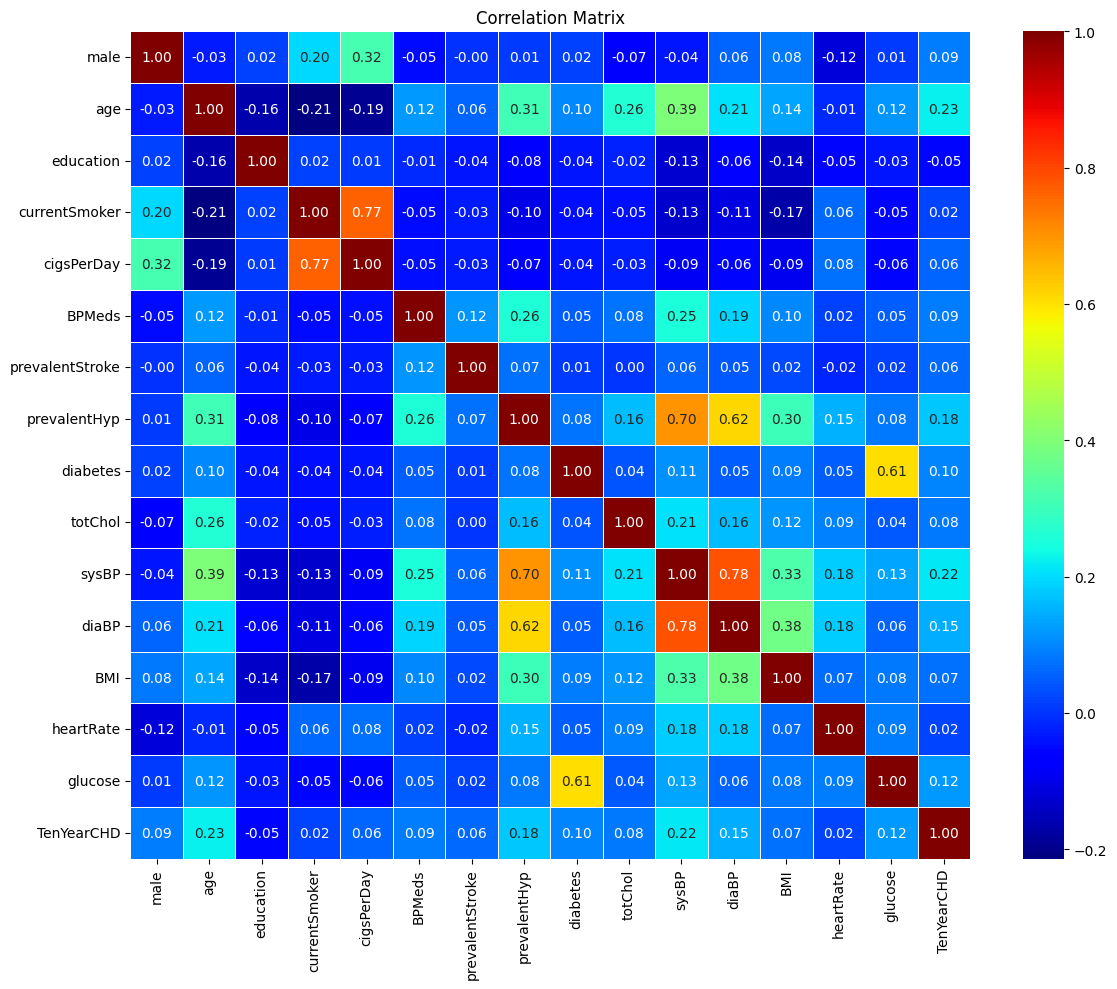

In [13]:
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='jet', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

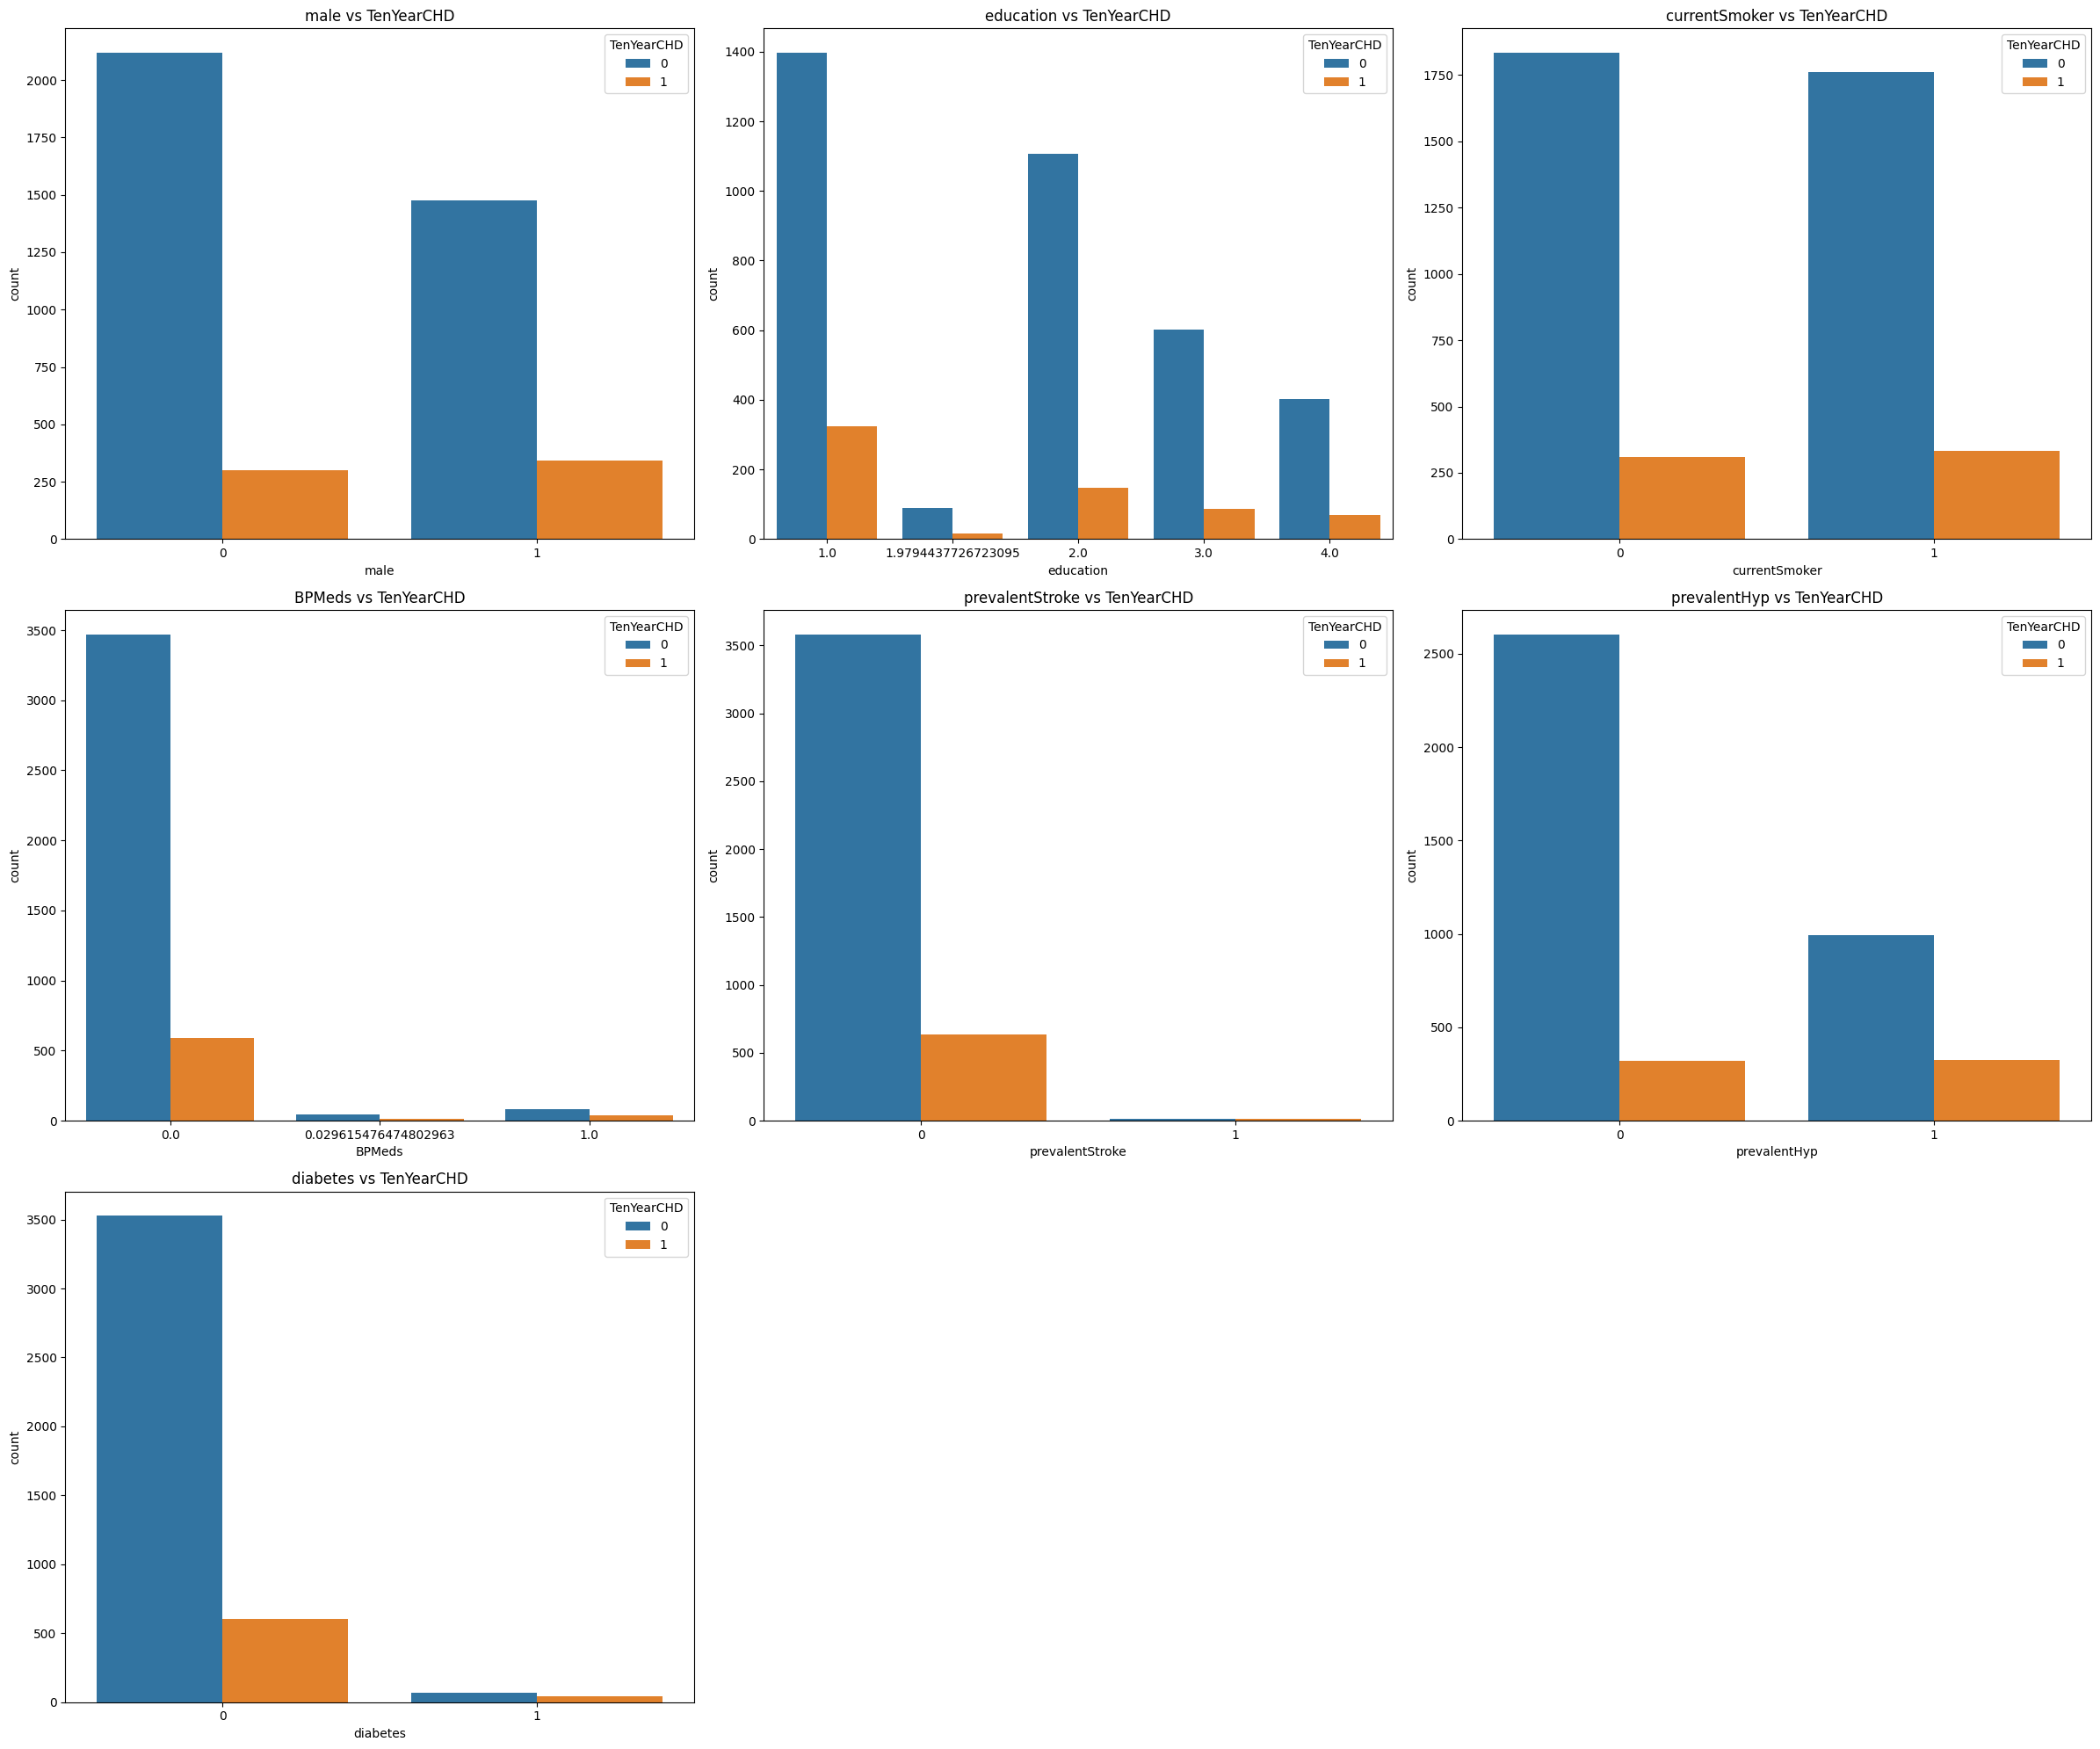

In [14]:
categorical_cols = ['male', 'education', 'currentSmoker', 'BPMeds', 
                        'prevalentStroke', 'prevalentHyp', 'diabetes']
    
numerical_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 
                      'diaBP', 'BMI', 'heartRate', 'glucose']


plt.figure(figsize=(24, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue='TenYearCHD', data=df)
    plt.title(f'{col} vs TenYearCHD')
plt.tight_layout()
plt.show()

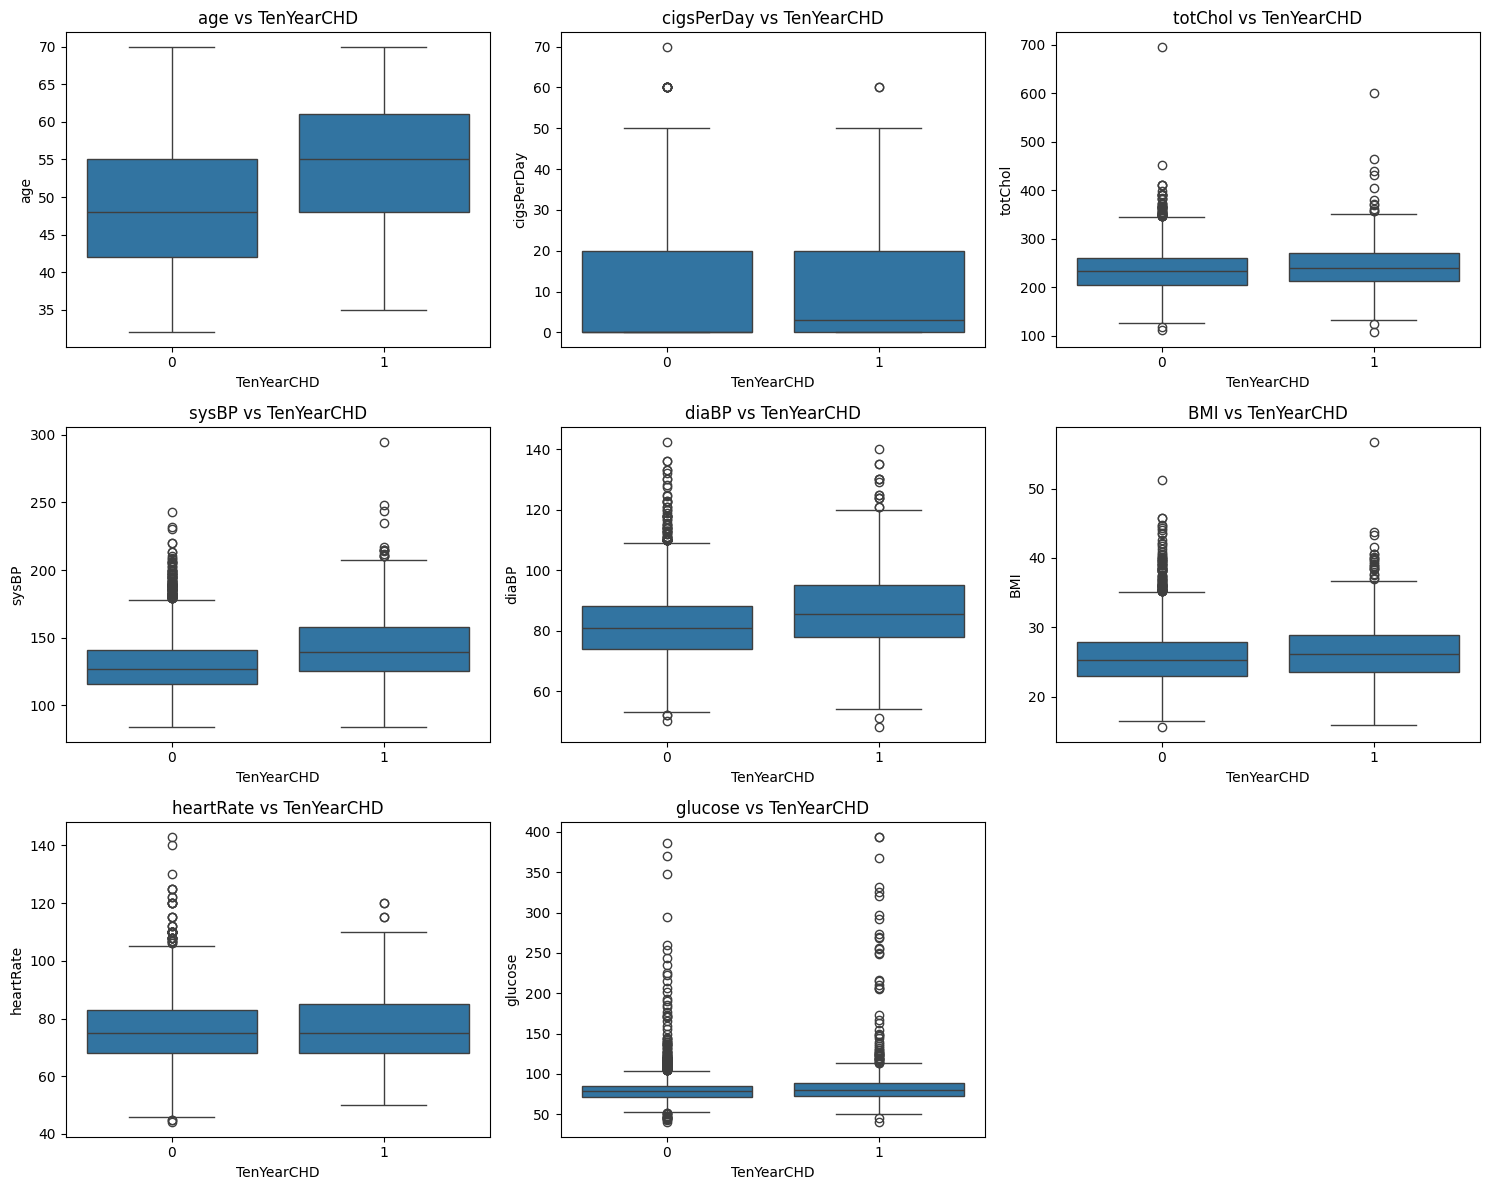

In [15]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='TenYearCHD', y=col, data=df)
    plt.title(f'{col} vs TenYearCHD')
plt.tight_layout()
plt.show()

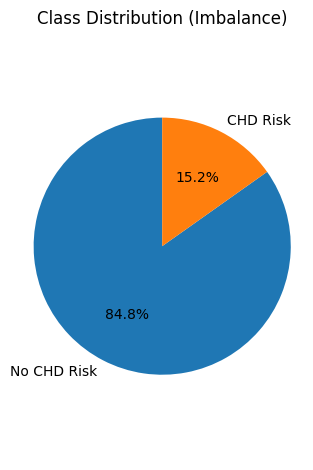

In [16]:
plt.subplot(1, 2, 2)
labels = ['No CHD Risk', 'CHD Risk']
sizes = df['TenYearCHD'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Class Distribution (Imbalance)')
plt.tight_layout()
plt.show()

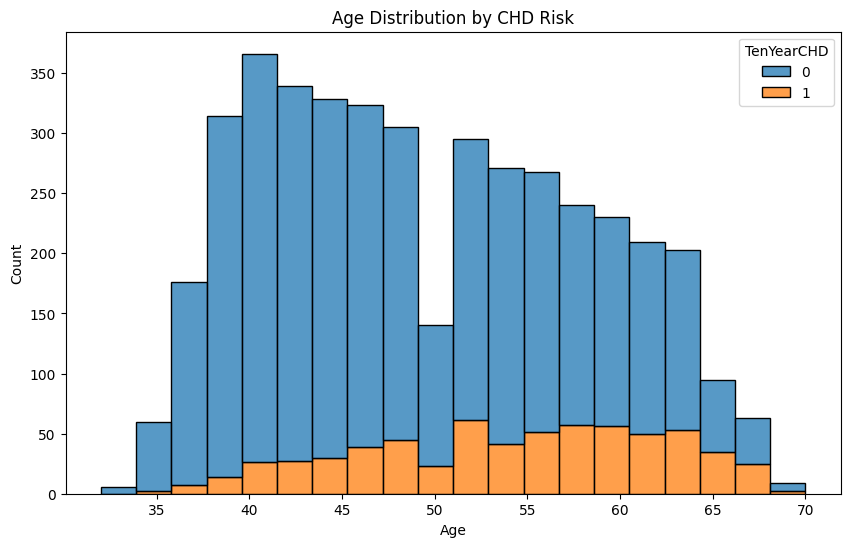

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='TenYearCHD', multiple="stack", bins=20)
plt.title('Age Distribution by CHD Risk')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<Figure size 1000x600 with 0 Axes>

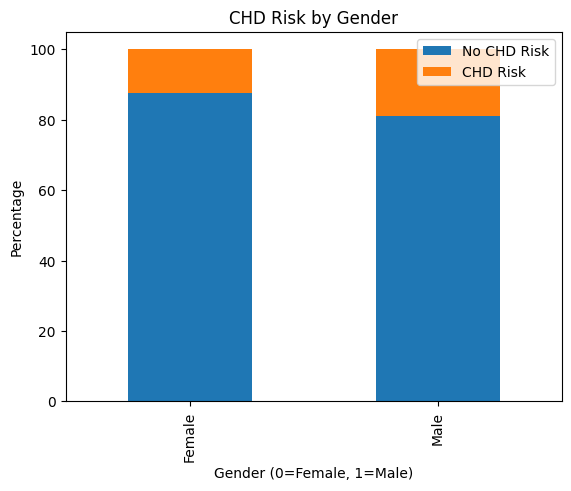

In [18]:
    plt.figure(figsize=(10, 6))
    gender_chd = pd.crosstab(df['male'], df['TenYearCHD'], normalize='index') * 100
    gender_chd.plot(kind='bar', stacked=True)
    plt.title('CHD Risk by Gender')
    plt.xlabel('Gender (0=Female, 1=Male)')
    plt.ylabel('Percentage')
    plt.xticks([0, 1], ['Female', 'Male'])
    plt.legend(['No CHD Risk', 'CHD Risk'])
    plt.show()


# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Preprocessing </p>

In [19]:
Q1 = df.TenYearCHD.quantile(0.25)
Q3 = df.TenYearCHD.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
df_no_outlier = df[(df.TenYearCHD>lower_limit)&(df.TenYearCHD<upper_limit)]
print(df_no_outlier.shape)
print(df.shape)

(0, 16)
(4240, 16)


In [ ]:
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print("Scaling numerical features...")
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


Scaling numerical features...


# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">build model</p>

In [22]:
def build_logistic_regression(X_train, y_train):
    """Build and train a Logistic Regression model"""
    print("\n===== LOGISTIC REGRESSION MODEL =====")
    
    # Define parameter grid for grid search
    param_grid = {
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
        'class_weight': [None, 'balanced']
    }
    
    # Create logistic regression model
    base_model = LogisticRegression(random_state=42, max_iter=1000)
    

    
    # Use cross-validation to find best parameters
    print("Performing grid search for best parameters...")
    grid_search = RandomizedSearchCV(
        estimator=base_model,
        param_distributions=param_grid,
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=0
    )
    
    grid_search.fit(X_train, y_train)
    
    # Get best model
    best_model = grid_search.best_estimator_
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
    return best_model


In [23]:
def build_xgboost(X_train, y_train):
    """Build and train an XGBoost model"""
    print("\n===== XGBOOST MODEL =====")
    
    # Define parameter grid for grid search
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 4, 5, 6],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'gamma': [0, 0.1, 0.2],
        'scale_pos_weight': [1, sum(y_train == 0) / sum(y_train == 1)]  # For imbalanced datasets
    }
    
    # Create XGBoost model
    base_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    
    # Use cross-validation to find best parameters
    print("Performing grid search for best parameters...")
    grid_search = RandomizedSearchCV(
        estimator=base_model,
        param_distributions=param_grid,
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=0
    )
    
    grid_search.fit(X_train, y_train)
    
    # Get best model
    best_model = grid_search.best_estimator_
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
    return best_model


In [24]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Evaluate the model performance"""
    print(f"\n===== EVALUATING {model_name} =====")
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Get probability predictions for ROC curve
    if hasattr(model, "predict_proba"):
        y_train_prob = model.predict_proba(X_train)[:, 1]
        y_test_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_train_prob = model.predict(X_train)
        y_test_prob = model.predict(X_test)
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    train_auc = roc_auc_score(y_train, y_train_prob)
    test_auc = roc_auc_score(y_test, y_test_prob)
    
    # Print results
    print("\nModel Performance:")
    print(f"{'Metric':<15} {'Training':<10} {'Testing':<10}")
    print(f"{'-'*35}")
    print(f"{'Accuracy':<15} {train_accuracy:.4f}     {test_accuracy:.4f}")
    print(f"{'Precision':<15} {train_precision:.4f}     {test_precision:.4f}")
    print(f"{'Recall':<15} {train_recall:.4f}     {test_recall:.4f}")
    print(f"{'F1 Score':<15} {train_f1:.4f}     {test_f1:.4f}")
    print(f"{'AUC-ROC':<15} {train_auc:.4f}     {test_auc:.4f}")
    
    # Check for overfitting
    if (train_accuracy - test_accuracy) > 0.05:
        print("\nWARNING: Possible overfitting detected.")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No CHD', 'CHD'], 
                yticklabels=['No CHD', 'CHD'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel

In [25]:
best_lr = build_logistic_regression(X_train, y_train)


===== LOGISTIC REGRESSION MODEL =====
Performing grid search for best parameters...
Best parameters: {'solver': 'saga', 'penalty': None, 'class_weight': 'balanced'}
Best cross-validation score: 0.7323


In [26]:
best_xgb = build_xgboost(X_train, y_train)


===== XGBOOST MODEL =====
Performing grid search for best parameters...


/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [00:12:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [00:12:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [00:12:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [00:12:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [00:12:38] WARNING: /w

Best parameters: {'subsample': 0.8, 'scale_pos_weight': 1, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.9}
Best cross-validation score: 0.7216



===== EVALUATING logistic regression =====

Model Performance:
Metric          Training   Testing   
-----------------------------------
Accuracy        0.6790     0.6698
Precision       0.2782     0.2541
Recall          0.6990     0.6047
F1 Score        0.3980     0.3578
AUC-ROC         0.7409     0.7001


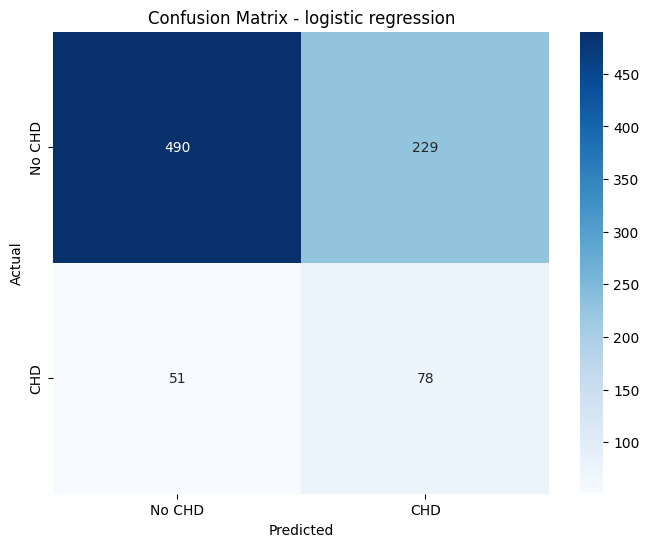


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.68      0.78       719
           1       0.25      0.60      0.36       129

    accuracy                           0.67       848
   macro avg       0.58      0.64      0.57       848
weighted avg       0.81      0.67      0.71       848



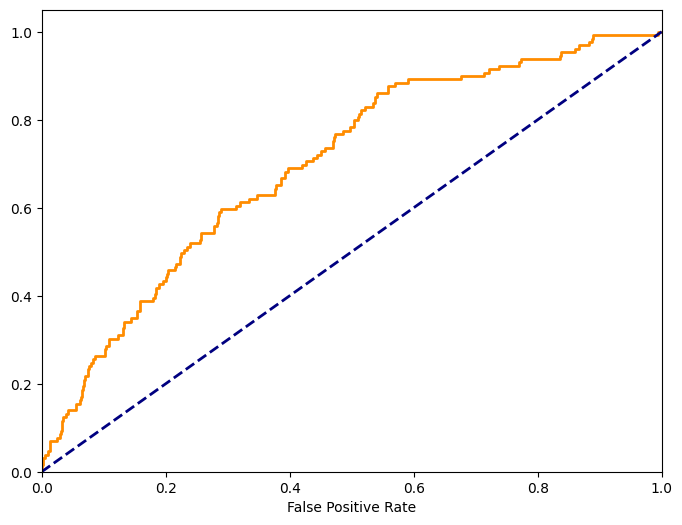

In [27]:
evaluate_model(best_lr, X_train, X_test, y_train, y_test, 'logistic regression')


===== EVALUATING XGBoost =====

Model Performance:
Metric          Training   Testing   
-----------------------------------
Accuracy        0.8482     0.8479
Precision       0.0000     0.0000
Recall          0.0000     0.0000
F1 Score        0.0000     0.0000
AUC-ROC         0.7914     0.6775


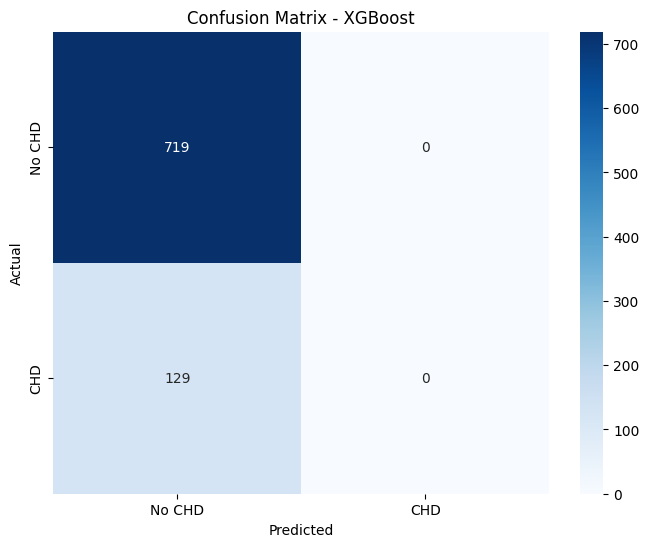


Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       719
           1       0.00      0.00      0.00       129

    accuracy                           0.85       848
   macro avg       0.42      0.50      0.46       848
weighted avg       0.72      0.85      0.78       848



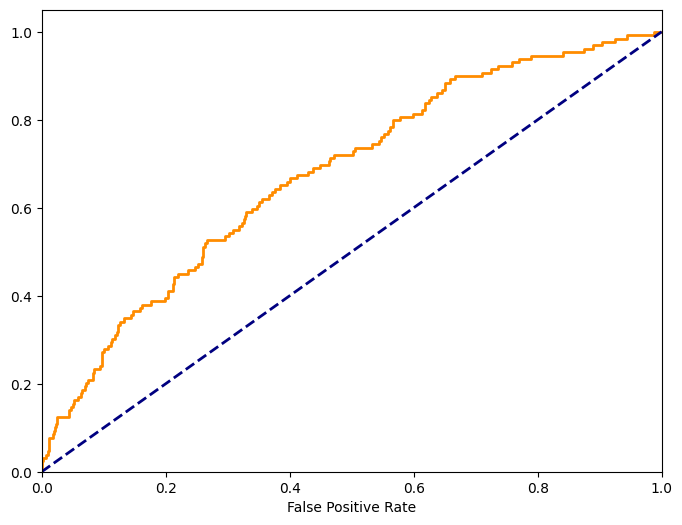

In [28]:
evaluate_model(best_xgb, X_train, X_test, y_train, y_test, 'XGBoost')

# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">solve imbalancing</p>

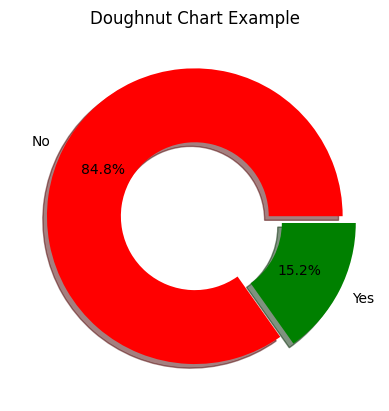

Class 0: 3596
Class 1: 644


In [29]:
if 'TenYearCHD' in df.columns:
    flag_counts = df['TenYearCHD'].value_counts()

    plt.figure(dpi=100)
    plt.pie(flag_counts,
            labels=['No','Yes'],  # Set labels correctly
            colors=['red', 'green'],
            explode=(0, 0.1),  # Ensure explode matches number of categories
            autopct='%1.1f%%',
            pctdistance=0.7,
            shadow=True,
            wedgeprops=dict(width=0.5))  # Creates doughnut effect

    plt.title('Doughnut Chart Example')
    plt.show()
else:
    print("Column 'FLAG' not found in the dataset.")
target_count = df['TenYearCHD'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])

In [30]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

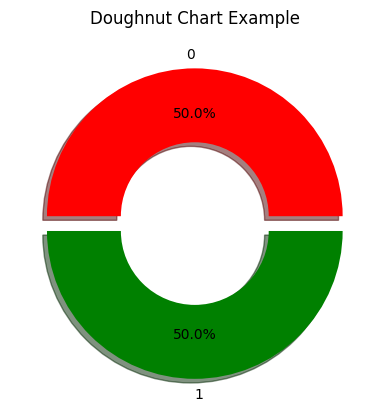

Class 0: 3596
Class 1: 3596


In [31]:
plt.figure(dpi=100)
plt.pie(
    y_sm.value_counts(),  # Counts of each category in y_sm
    labels=y_sm.value_counts().index,  # Correct labels (categories)
    colors=['red', 'green'],  # Colors for each category (adjust if necessary)
    explode=(0, 0.1),  # Slightly explode the minority class
    autopct='%1.1f%%',  # Percentage formatting
    pctdistance=0.7,  # Distance for percentage labels
    shadow=True,  # Add shadow to the chart
    wedgeprops=dict(width=0.5)  # Doughnut chart effect
)

# Add title
plt.title('Doughnut Chart Example')

# Show the plot
plt.show()
target_count = y_sm.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])

In [32]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">build best model</p>

In [34]:
bbest_lr = build_logistic_regression(X_train_scaled, y_train_res)


===== LOGISTIC REGRESSION MODEL =====
Performing grid search for best parameters...
Best parameters: {'solver': 'saga', 'penalty': 'l1', 'class_weight': None}
Best cross-validation score: 0.7448


In [35]:
bbest_xgb = build_xgboost(X_train_scaled, y_train_res)


===== XGBOOST MODEL =====
Performing grid search for best parameters...


/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [00:12:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [00:12:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [00:12:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [00:12:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [00:12:41] WARNING: /w

Best parameters: {'subsample': 0.9, 'scale_pos_weight': 1.0, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 1.0}
Best cross-validation score: 0.9613



===== EVALUATING best logistic regression =====

Model Performance:
Metric          Training   Testing   
-----------------------------------
Accuracy        0.6905     0.6698
Precision       0.6830     0.2557
Recall          0.7108     0.6124
F1 Score        0.6966     0.3607
AUC-ROC         0.7476     0.6964


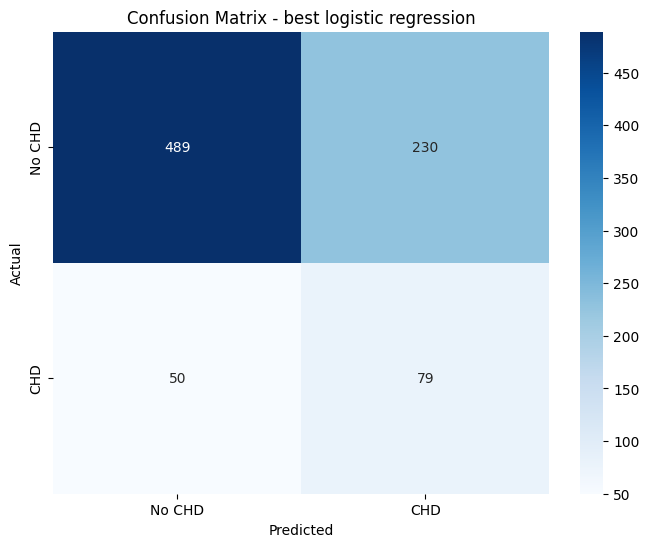


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.68      0.78       719
           1       0.26      0.61      0.36       129

    accuracy                           0.67       848
   macro avg       0.58      0.65      0.57       848
weighted avg       0.81      0.67      0.71       848



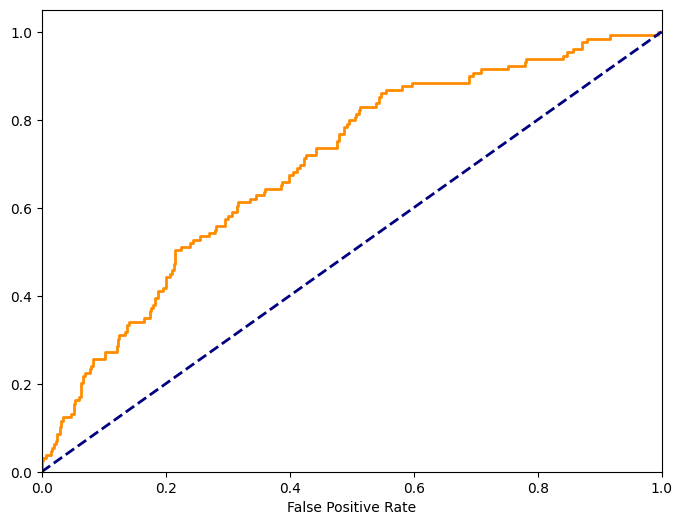

In [36]:
evaluate_model(bbest_lr, X_train_scaled, X_test_scaled, y_train_res, y_test, 'best logistic regression')


===== EVALUATING best XGBoost =====

Model Performance:
Metric          Training   Testing   
-----------------------------------
Accuracy        0.9983     0.7889
Precision       1.0000     0.2093
Recall          0.9965     0.1395
F1 Score        0.9983     0.1674
AUC-ROC         1.0000     0.5721



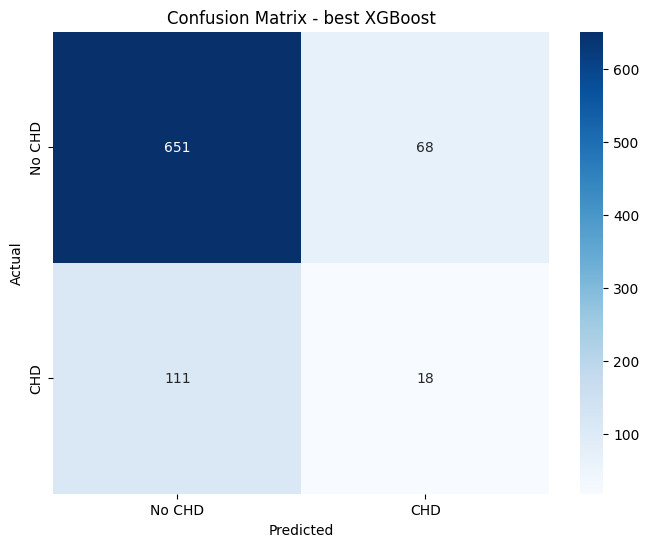


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       719
           1       0.21      0.14      0.17       129

    accuracy                           0.79       848
   macro avg       0.53      0.52      0.52       848
weighted avg       0.76      0.79      0.77       848



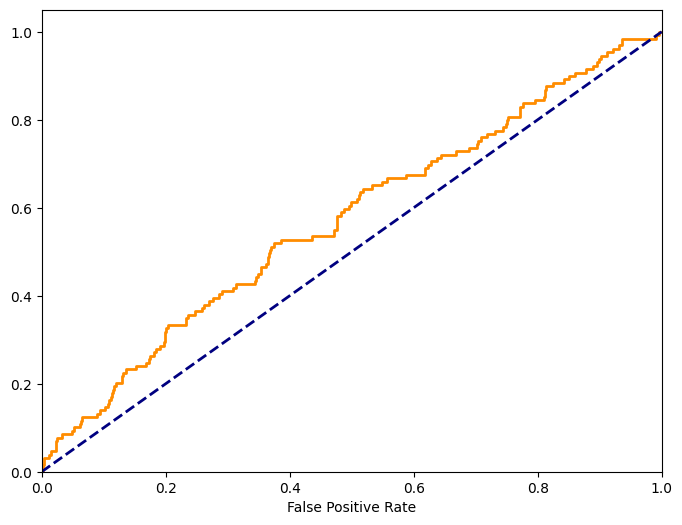

In [37]:
evaluate_model(bbest_xgb, X_train_scaled, X_test_scaled, y_train_res, y_test, 'best XGBoost')

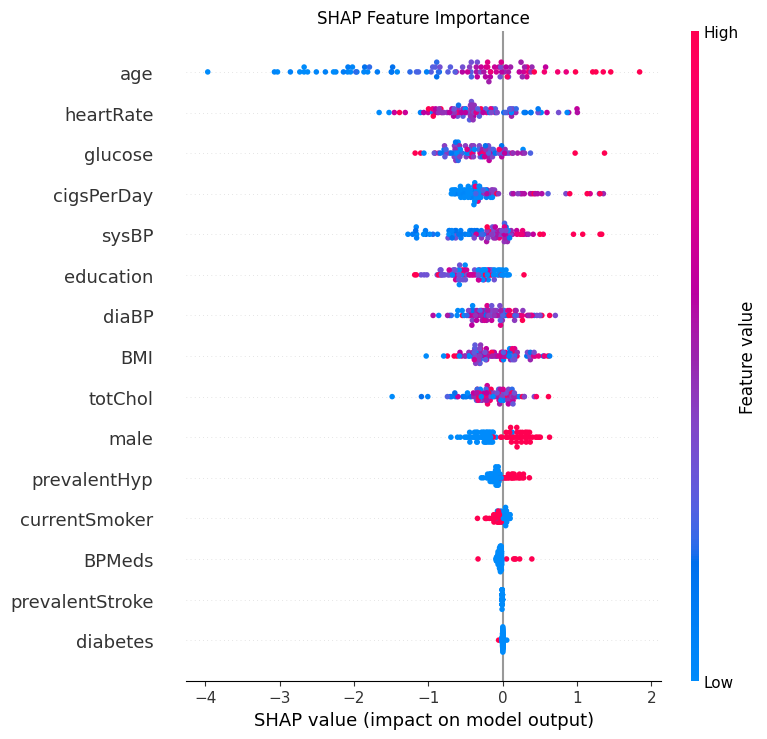

In [38]:
X_shap = X_test_scaled[:100]  # Using a subset of test data

# Initialize SHAP explainer
explainer = shap.TreeExplainer(bbest_xgb)
shap_values = explainer.shap_values(X_shap)

# Summary plot
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_shap, feature_names=X.columns, show=False)
plt.title('SHAP Feature Importance')
plt.tight_layout()
plt.show()

# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">save model</p>

In [40]:
joblib.dump(bbest_lr,'pre_Hdisease.joblib')

['pre_Hdisease.joblib']